<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/NLP_Project_2_Part_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
filePath = '/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


### Read Data

In [3]:
df = pd.read_json(filePath, lines=True)


In [4]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
df['article_link'][0]

'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5'

In [6]:
df.shape

(26709, 3)

In [7]:
import requests

In [8]:
r = requests.get(df['article_link'][0])

In [9]:
r.text

'<?xml version="1.0" encoding="iso-8859-1"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n         "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n\t<head>\n\t\t<title>403 - Forbidden</title>\n\t</head>\n\t<body>\n\t\t<h1>403 - Forbidden</h1>\n\t</body>\n</html>\n'

### Unable to crawl the URL links, hence Sarcasm detection model input will be only the headlines.

In [10]:
df.drop(columns= ['article_link'], inplace=True)

In [11]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [12]:
# remove punctuations
df['headline'] = df['headline'].str.replace('[^\w\s]','')

In [13]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear sons web series closest t...,1
3,boehner just wants wife to listen not come up ...,1
4,jk rowling wishes snape happy birthday in the ...,0


In [14]:
# To Lower
df['headline'] = df['headline'].str.lower()

In [15]:
# remove spave
df['headline'] = df['headline'].apply(lambda text: " ".join(text.split()))


In [16]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear sons web series closest t...,1
3,boehner just wants wife to listen not come up ...,1
4,jk rowling wishes snape happy birthday in the ...,0


In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Remove stop words

eng_stopwords = set(stopwords.words('english'))

df['headline'] = df['headline'].apply(lambda text: " ".join([word for word in str(text).split() if word not in eng_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,mom starting fear sons web series closest thin...,1
3,boehner wants wife listen come alternative deb...,1
4,jk rowling wishes snape happy birthday magical...,0


In [19]:
docs = df['headline']
lables = df['is_sarcastic']

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1


# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)


# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[204, 14545, 692, 3437, 2128, 267, 33, 2025, 2396, 8164], [8165, 3168, 2570, 8166, 296, 2760, 156, 846], [68, 713, 693, 990, 1933, 468, 4515, 118, 10411], [1355, 127, 327, 1537, 216, 3169, 14546, 757], [4516, 4517, 785, 10412, 469, 451, 1137, 32], [10413, 259, 23], [6728, 247, 424, 14547, 1465], [364, 1055, 69, 45, 78, 248], [157, 3716, 6729, 436, 5036, 1850, 70], [1934, 225, 217, 297, 16, 14548, 3717], [2761, 1466, 5037, 3, 4082, 6730, 1935, 991], [189, 660, 365, 1407, 1755, 3438], [140, 396, 2762, 2, 812, 4, 253, 4083, 8167, 63], [133, 3718, 8168, 2571, 10414], [14549, 1253, 517, 527, 221, 758], [470, 1935, 10415, 10416, 5748, 1682], [2397, 1208, 277, 3439, 239, 216, 964, 14550, 992, 284, 28, 1180], [1607, 8169, 2950, 8170, 6731, 1093], [10417, 714, 1756, 156, 1056, 117, 2572], [3440, 4084, 3170], [8171, 3719, 715, 1408, 10418, 6732], [2, 1254, 57, 661, 610, 5038, 1094, 3171, 2266, 1683, 10419], [3720, 10420, 5749, 10, 2951, 14551, 4518], [1057, 105, 5750], [437, 382, 624, 2763, 317

In [21]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [22]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [24]:
tf.keras.backend.clear_session()


In [25]:
padded_docs.shape

(26709, 4)

In [26]:
lables.shape

(26709,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, lables, test_size=0.30, random_state=100)


In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18696, 4), (8013, 4), (18696,), (8013,))

In [29]:
tf.keras.backend.clear_session()

In [30]:
# define model
model = Sequential()

model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=4, trainable=False))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.3, verbose=1, callbacks=[earlystop]) 


Epoch 1/10
409/409 [==============================] - 9s 6ms/step - loss: 0.6327 - accuracy: 0.6413 - val_loss: 0.6218 - val_accuracy: 0.6534
Epoch 2/10
409/409 [==============================] - 2s 5ms/step - loss: 0.5997 - accuracy: 0.6778 - val_loss: 0.6170 - val_accuracy: 0.6673
Epoch 3/10
409/409 [==============================] - 2s 5ms/step - loss: 0.5818 - accuracy: 0.6905 - val_loss: 0.6030 - val_accuracy: 0.6748
Epoch 4/10
409/409 [==============================] - 2s 4ms/step - loss: 0.5632 - accuracy: 0.7083 - val_loss: 0.6069 - val_accuracy: 0.6802
Epoch 5/10
409/409 [==============================] - 2s 4ms/step - loss: 0.5445 - accuracy: 0.7225 - val_loss: 0.6065 - val_accuracy: 0.6768
Epoch 6/10
409/409 [==============================] - 2s 4ms/step - loss: 0.5263 - accuracy: 0.7374 - val_loss: 0.5992 - val_accuracy: 0.6782


In [31]:
predictions = model.predict(X_test)
y_test_predict = [int(x) for x in predictions > 0.5]


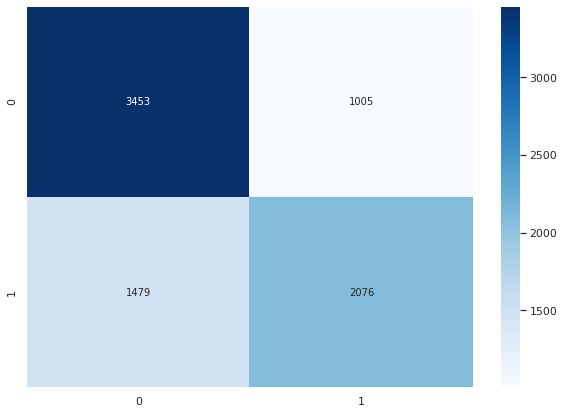

In [32]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


### Bidirectional LSTM

In [33]:
tf.keras.backend.clear_session()

In [34]:
# define model
model = Sequential()

model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=4, trainable=False))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.3, verbose=1, callbacks=[earlystop]) 


Epoch 1/10
409/409 [==============================] - 6s 8ms/step - loss: 0.6253 - accuracy: 0.6497 - val_loss: 0.6269 - val_accuracy: 0.6486
Epoch 2/10
409/409 [==============================] - 3s 6ms/step - loss: 0.5943 - accuracy: 0.6807 - val_loss: 0.6092 - val_accuracy: 0.6734
Epoch 3/10
409/409 [==============================] - 3s 6ms/step - loss: 0.5698 - accuracy: 0.7041 - val_loss: 0.5989 - val_accuracy: 0.6784
Epoch 4/10
409/409 [==============================] - 3s 6ms/step - loss: 0.5407 - accuracy: 0.7269 - val_loss: 0.6024 - val_accuracy: 0.6814


In [35]:
predictions = model.predict(X_test)
y_test_predict = [int(x) for x in predictions > 0.5]


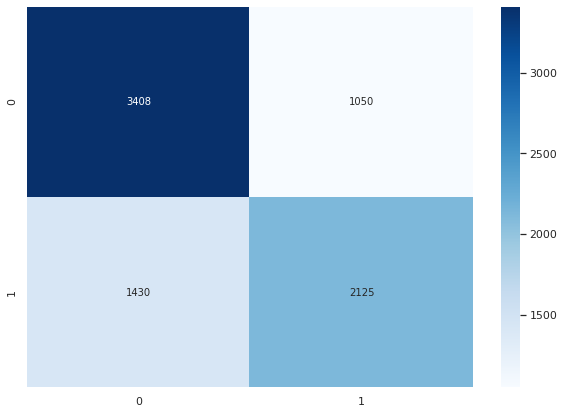

In [36]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


In [38]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/NLP Project - 2 - Part 2 2.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NLP Project - 2 - Part 2 2.ipynb to html
[NbConvertApp] Writing 1447767 bytes to /content/drive/MyDrive/Colab Notebooks/NLP Project - 2 - Part 2 2.html
